In [84]:
#Importing Libraries, Setting Env
import json
from pprint import pprint
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML
pd.set_option('display.max_columns', 35)

#### Sample Data Structure

In [85]:
with open('Raw_Data//refugees to Kenya.json') as f:
    data = json.load(f)
    
#pprint(data['data'])

{'geoMasterId': {'adm': 'Country', <br/>
                 'id': 178,<br/>
                 'lat': 0.537253,<br/>
                 'lon': 37.8802,<br/>
                 'name': 'Kenya'},<br/>
 'source': 'UNHCR',<br/>
 'timeseries': [{'data_date': '2013-12-31',<br/>
                 'individuals': 46176,<br/>
                 'unix_timestamp': 1388448000},<br/>

###  Extract each country data -> turn into csv file

In [86]:
date = []
timestamp = []
individuals = [] 
_country = []
country_list = ['DRC','Ethiopia','Kenya','Sudan','Uganda']

for country in country_list:
    date = []
    timestamp = []
    individuals = [] 
    _country = []
    with open('Raw_Data/refugees to ' + country + '.json') as f:
        data = json.load(f)
        #pprint(data)
        data_country = data['data']['timeseries']    
        
    for data in data_country:
        date.append(data['data_date'])
        timestamp.append(data['unix_timestamp'])
        individuals.append(data['individuals'])
        _country.append(country)
        
    refugees_to_all_countries_df = pd.DataFrame({'date': date, 'timestamp': timestamp, 'individuals': individuals, 'to': _country})
    refugees_to_all_countries_df.sort_values(by=['timestamp'])
    refugees_to_all_countries_df['period_change'] = refugees_to_all_countries_df['individuals'].diff()
    refugees_to_all_countries_df = refugees_to_all_countries_df.fillna(0.0)
    refugees_to_all_countries_df['Year']=[d.split('-')[0] for d in refugees_to_all_countries_df.date]
    refugees_to_all_countries_df['Month']=[d.split('-')[1] for d in refugees_to_all_countries_df.date]
    refugees_to_all_countries_df['Day']=[d.split('-')[2] for d in refugees_to_all_countries_df.date]
    refugees_to_all_countries_df = refugees_to_all_countries_df.sort_values(by=['timestamp'])
    #refugees_to_all_countries_df.to_csv("refugees_to_"+ country +"_cleaned.csv", sep=',')
    print("Refugees To : " + country)
    display(refugees_to_all_countries_df.head(3))
    

Refugees To : DRC


,date,timestamp,individuals,to,period_change,Year,Month,Day
0,2014-10-31,1414713600,1796,DRC,0.0,2014,10,31
1,2014-11-30,1417305600,1796,DRC,0.0,2014,11,30
2,2014-12-31,1419984000,1796,DRC,0.0,2014,12,31


Refugees To : Ethiopia


,date,timestamp,individuals,to,period_change,Year,Month,Day
0,2013-12-31,1388448000,68465,Ethiopia,0.0,2013,12,31
1,2014-03-31,1396224000,157422,Ethiopia,88957.0,2014,03,31
2,2014-06-30,1404086400,208820,Ethiopia,51398.0,2014,06,30


Refugees To : Kenya


,date,timestamp,individuals,to,period_change,Year,Month,Day
0,2013-12-31,1388448000,46176,Kenya,0.0,2013,12,31
1,2014-03-31,1396224000,63211,Kenya,17035.0,2014,03,31
2,2014-06-30,1404086400,76310,Kenya,13099.0,2014,06,30


Refugees To : Sudan


,date,timestamp,individuals,to,period_change,Year,Month,Day
0,2014-03-31,1396224000,59580,Sudan,0.0,2014,03,31
1,2014-06-30,1404086400,85972,Sudan,26392.0,2014,06,30
2,2014-09-30,1412035200,96603,Sudan,10631.0,2014,09,30


Refugees To : Uganda


,date,timestamp,individuals,to,period_change,Year,Month,Day
0,2012-12-31,1356912000,12524,Uganda,0.0,2012,12,31
1,2013-12-31,1388448000,25274,Uganda,12750.0,2013,12,31
2,2014-03-31,1396224000,118051,Uganda,92777.0,2014,03,31


### Merge all countries data

In [87]:
date = []
timestamp = []
individuals = [] 
_country = []
period_change = []
country_list = ['DRC','Ethiopia','Kenya','Sudan','Uganda']

for country in country_list:
    with open('Raw_Data//refugees to ' + country + '.json') as f:
        data = json.load(f)
        data_country = data['data']['timeseries']    
        
    for data in data_country:
        date.append(data['data_date'])
        timestamp.append(data['unix_timestamp'])
        individuals.append(data['individuals'])
        _country.append(country)
        
refugees_to_all_countries_df = pd.DataFrame({'date': date, 'timestamp': timestamp, 'individuals': individuals, 'to': _country})
refugees_to_all_countries_df['Year']=[d.split('-')[0] for d in refugees_to_all_countries_df.date]
refugees_to_all_countries_df['Month']=[d.split('-')[1] for d in refugees_to_all_countries_df.date]
refugees_to_all_countries_df['Day']=[d.split('-')[2] for d in refugees_to_all_countries_df.date]
refugees_to_all_countries_df = refugees_to_all_countries_df.sort_values(by=['timestamp'])
refugees_to_all_countries_df.head()
#refugees_to_all_countries_df.to_csv("refugees_to_neighbor_countries_cleaned.csv", sep=',')

,date,timestamp,individuals,to,Year,Month,Day
200,2012-12-31,1356912000,12524,Uganda,2012,12,31
98,2013-12-31,1388448000,46176,Kenya,2013,12,31
49,2013-12-31,1388448000,68465,Ethiopia,2013,12,31
201,2013-12-31,1388448000,25274,Uganda,2013,12,31
146,2014-03-31,1396224000,59580,Sudan,2014,03,31


In [88]:
#Merge all country data with diff
country_list = ['DRC','Ethiopia','Kenya','Sudan','Uganda']

df0 = pd.read_csv("Cleaned_CsvFiles/refugees_to_"+ country_list[0] +"_cleaned.csv")
df1 = pd.read_csv("Cleaned_CsvFiles/refugees_to_"+ country_list[1] +"_cleaned.csv")
df2 = pd.read_csv("Cleaned_CsvFiles/refugees_to_"+ country_list[2] +"_cleaned.csv")
df3 = pd.read_csv("Cleaned_CsvFiles/refugees_to_"+ country_list[3] +"_cleaned.csv")
df4 = pd.read_csv("Cleaned_CsvFiles/refugees_to_"+ country_list[4] +"_cleaned.csv")
frames = [df0,df1,df2,df3,df4]


In [89]:
refugees_to_all_countries_w_diff = pd.concat(frames)  
refugees_to_all_countries_w_diff = refugees_to_all_countries_w_diff.sort_values(by = ['timestamp'])
refugees_to_all_countries_w_diff.head(10)
refugees_to_all_countries_w_diff.to_csv("Cleaned_CsvFiles/refugees_to_neighbor_countries_w_diff.csv", sep=',')

#### Loading file : Refugees from south sudan 

In [90]:
date = []
timestamp = []
individuals = [] 

with open('Raw_Data/refugees from south-sudan all.json') as f:
    data = json.load(f)
    #pprint(data)
    
data_country = data['data']['timeseries']  
for data in data_country:
    date.append(data['data_date'])
    timestamp.append(data['unix_timestamp'])
    individuals.append(data['individuals'])

df = pd.DataFrame({'date': date, 'timestamp': timestamp, 'individuals': individuals})
df['Year']=[d.split('-')[0] for d in df.date]
df['Month']=[d.split('-')[1] for d in df.date]
df['Day']=[d.split('-')[2] for d in df.date]

#df.to_csv('refugees from south-sudan all_cleaned.csv', sep = ',')

In [91]:
df.head(3)

,date,timestamp,individuals,Year,Month,Day
0,2014-03-31,1396224000,398264,2014,03,31
1,2014-06-30,1404086400,513868,2014,06,30
2,2014-09-30,1412035200,589560,2014,09,30


In [92]:
df['Diff'] = df['individuals'].diff()
df.head(3)

,date,timestamp,individuals,Year,Month,Day,Diff
0,2014-03-31,1396224000,398264,2014,03,31,NaN
1,2014-06-30,1404086400,513868,2014,06,30,115604.0
2,2014-09-30,1412035200,589560,2014,09,30,75692.0


In [93]:
df.to_csv('Cleaned_CsvFiles/refugees_from_southsudan_with_difference.csv', sep = ',')

# Visualising Data

## Refugees growth each year

In [94]:
df = pd.read_csv('Cleaned_CsvFiles/refugees_from_southsudan_with_difference.csv')
#df = df.groupby(['Year','Month']).mean()
#df.head(20)

In [95]:
%%HTML
<div class='tableauPlaceholder' id='viz1547905931207' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RefugeesFromSouthSudanTrend&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1547905931207');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

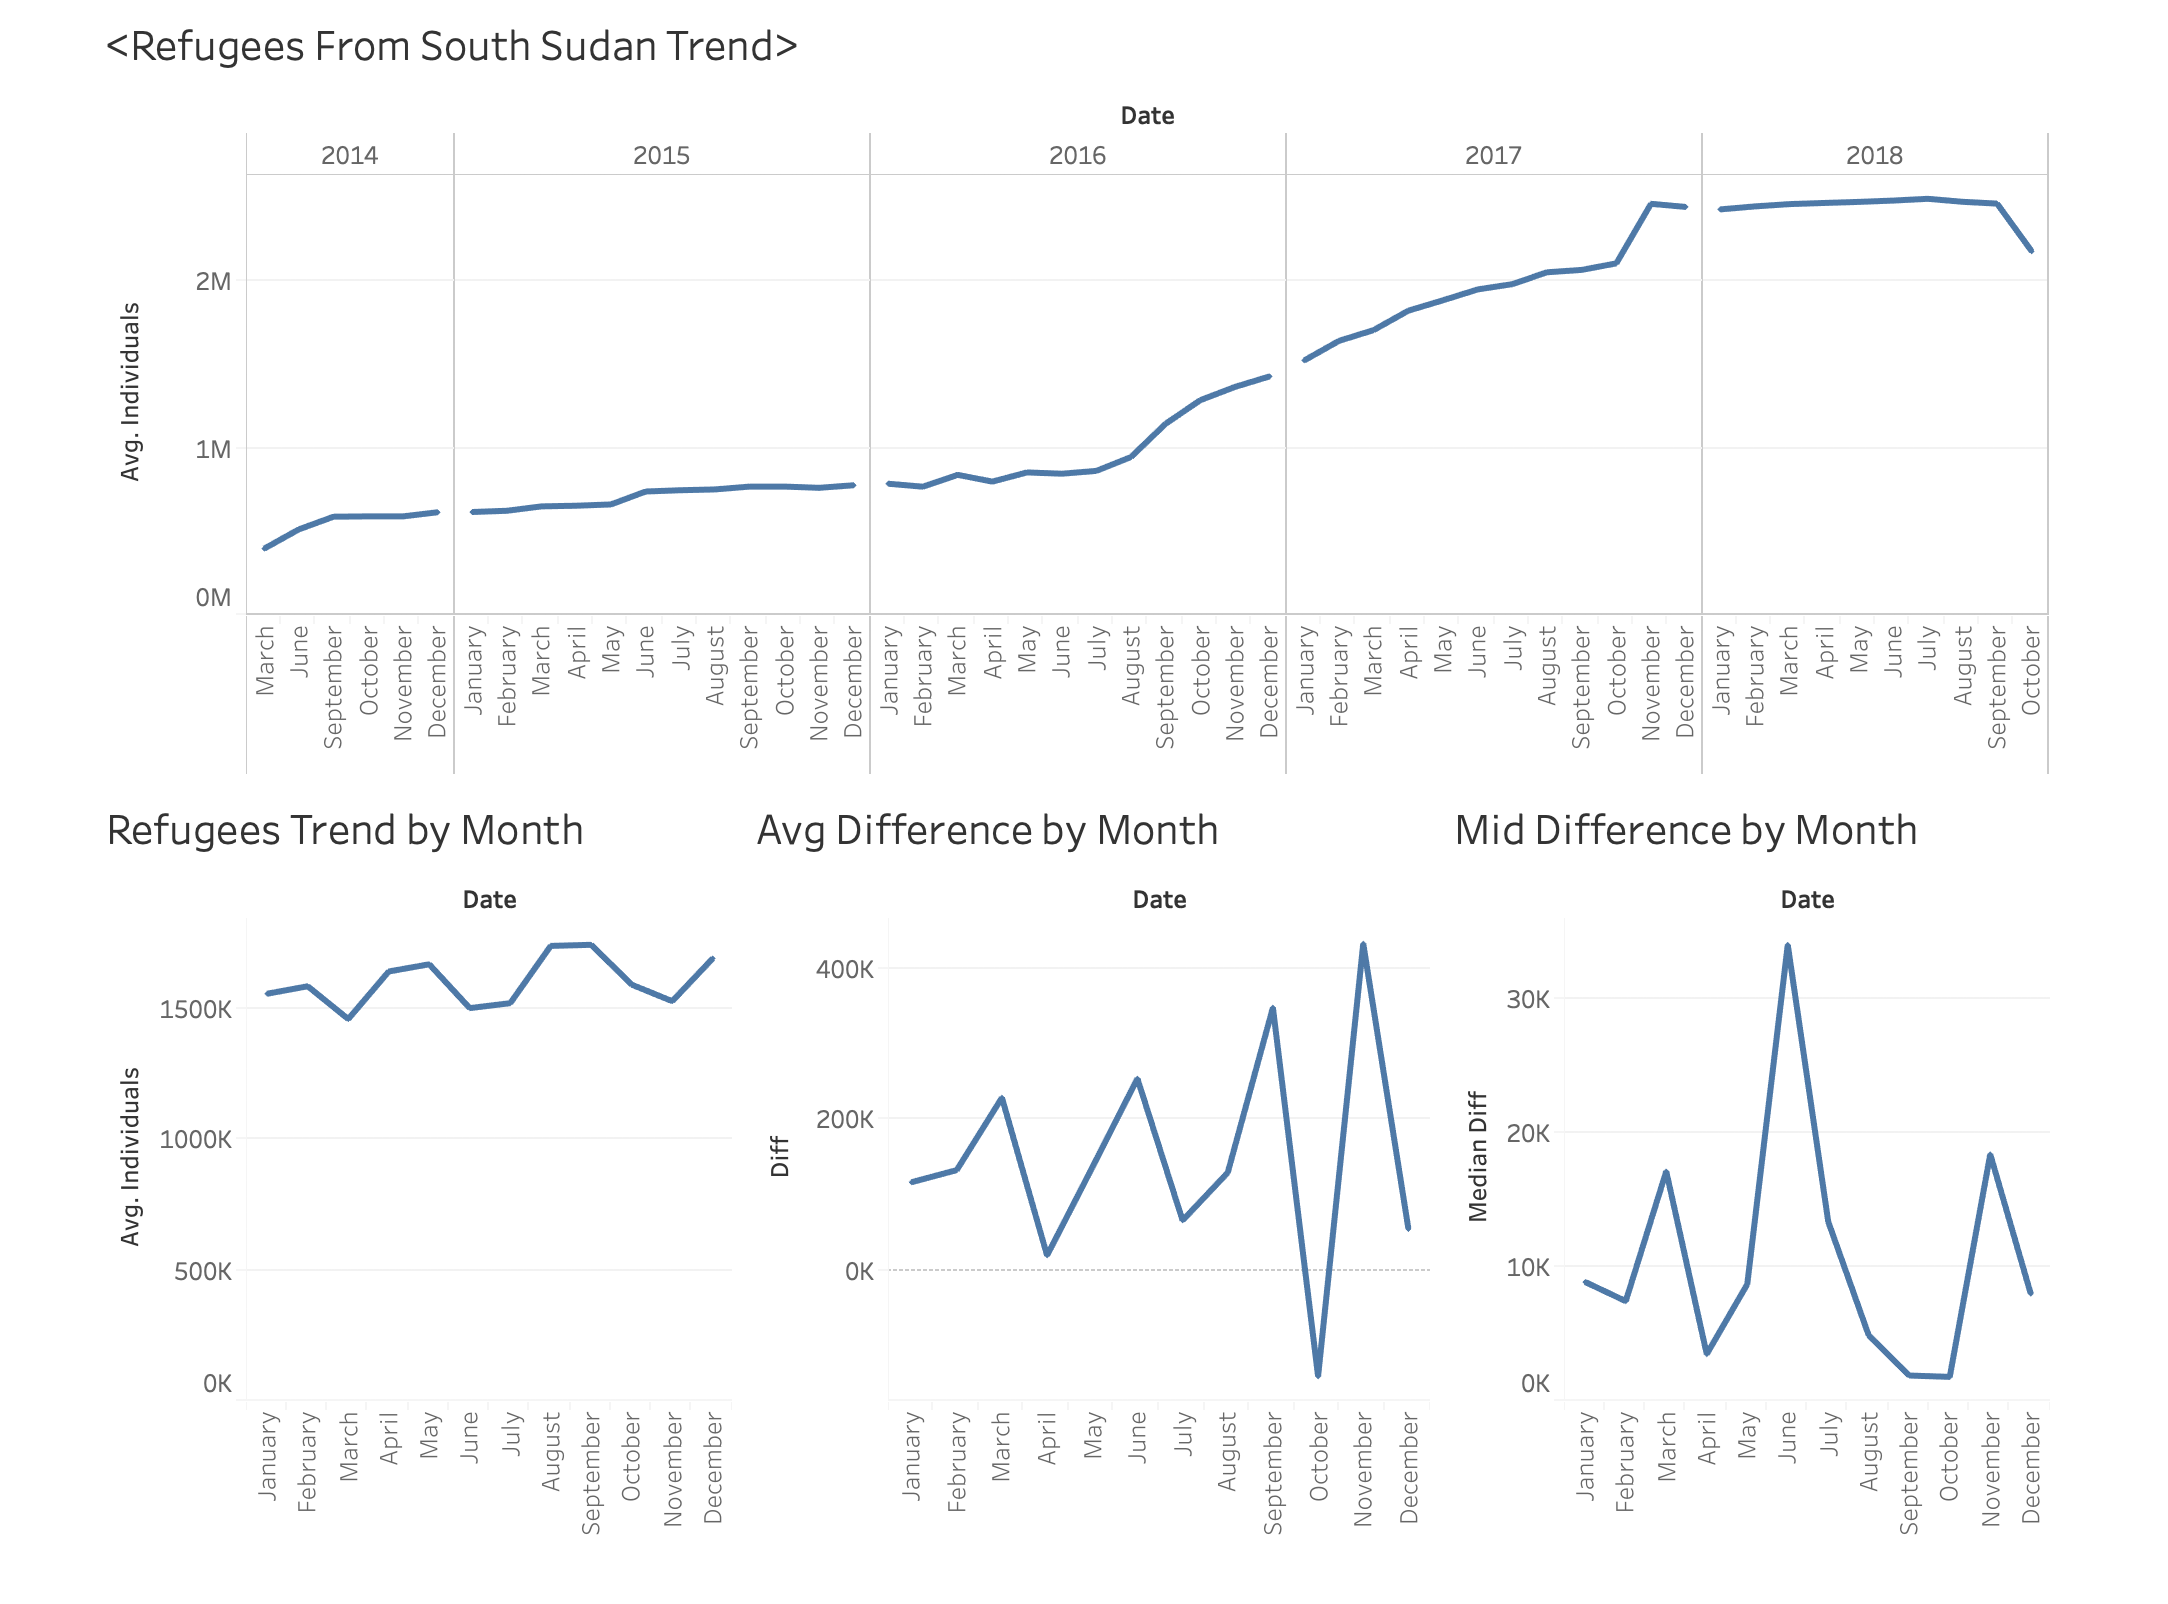

In [96]:
#In case above link doesn't render image in github
Image(filename='img/Refugees_from south_sudan_trend.png') 

Refugees are constantly moving to other countries with about 30,000 people per month in average since 2014. There are a few pinpoints in the graph where some interesting huge drop or increase appears in some months. We will continue to analyze these peaks in the following sections by joining different datasets together to find out the reason from the perspective of data science and by referring to real situations (News). 

Finally, we expect to find some models that can be trained and help us to predict future situations.

##### Huge drop in October 2018
Appearently caused by signing end civil war agreenment. "South Sudan rebel leader Riek Machar returned to the capital Juba on October 31st, 2018 to celebrate a peace deal, more than two years after fierce fighting erupted in the city and forced him to flee the country."(Source: https://www.reuters.com/article/us-southsudan-peaceconference/south-sudan-rebel-leader-machar-returns-to-mark-peace-deal-idUSKCN1N50LI)

### First Try, Prediction of future refugees from South Sudan Using Timeseries Model

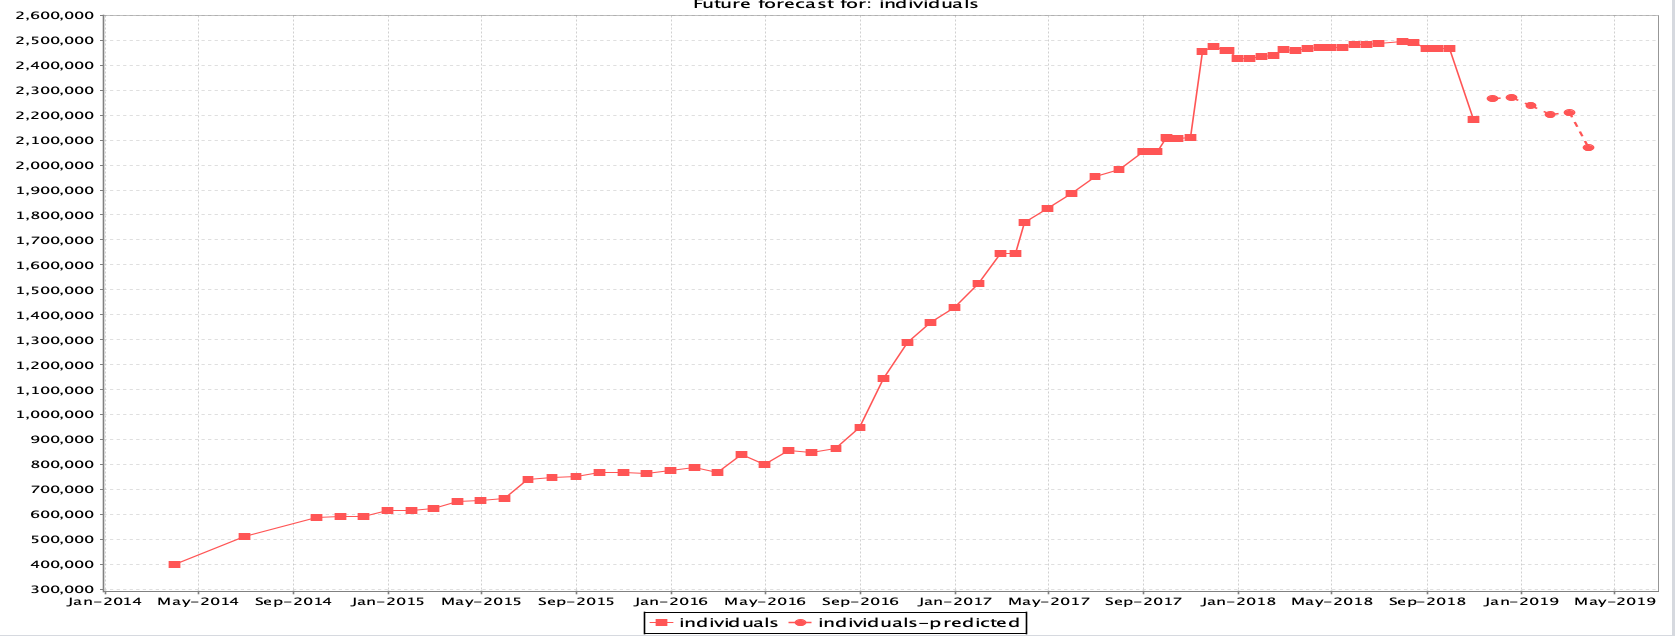

In [97]:
#By Timeseries forecasting
Image(filename='Results_R_From_SS/Forecast_From_SouthSudan_Full.png') 

Prediction: <br/>
2018-11-24*  2265570.3714 <br/>
2018-12-19*  2270693.0898 <br/>
2019-01-12*  2239656.3449 <br/>
2019-02-06*  2201717.8884 <br/>
2019-03-03*  2208591.5167 <br/>
2019-03-27*  2068579.1076 <br/>

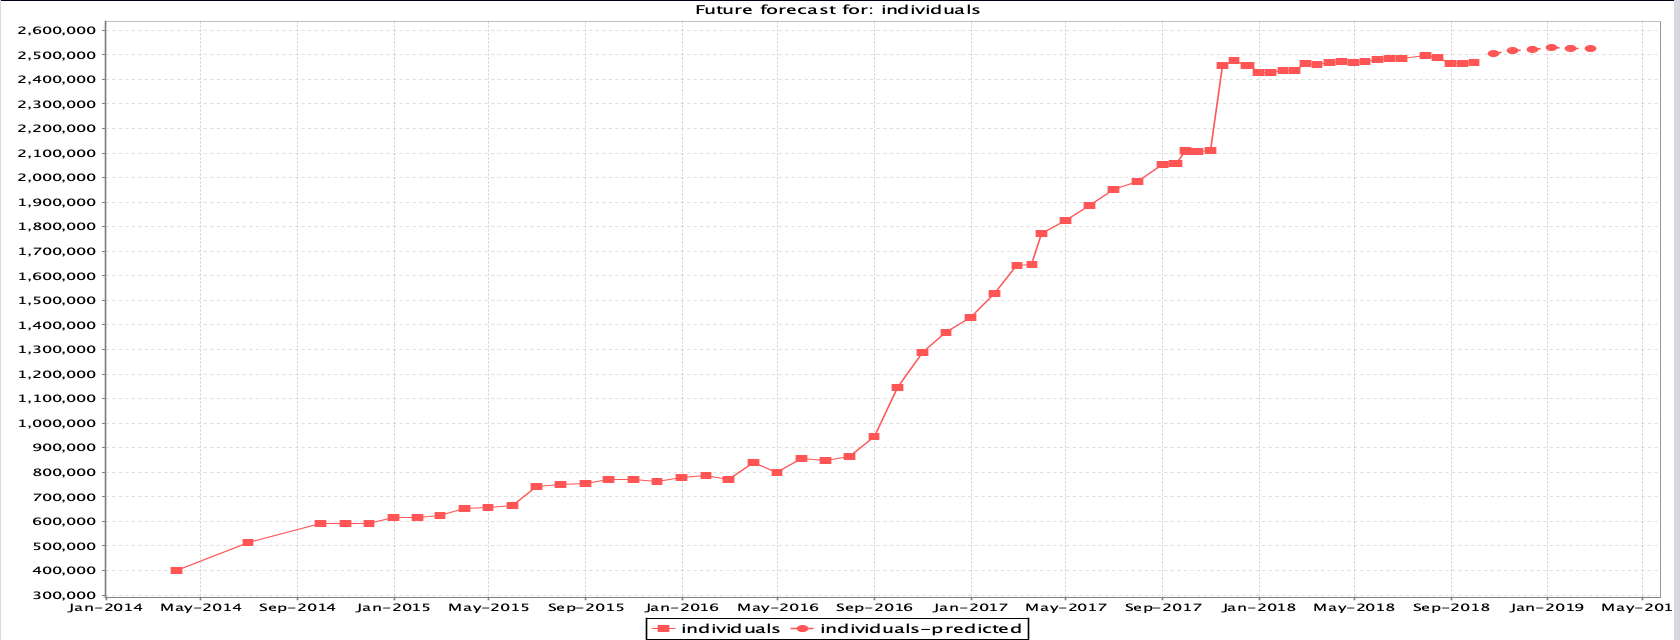

In [98]:
#If remove the huge drop row from the dataset
Image(filename='Results_R_From_SS//Forecast_From_SouthSudan_full_withoutLatest.png') 

### Predict with Linear Regression

=== Classifier model (full training set) ===

Linear Regression Model

individuals =

      0.0185 * timestamp +
-25845083.2239

Time taken to build model: 0 seconds

=== Summary ===

Correlation coefficient                  0.9539

Mean absolute error                 180251.8474

Root mean squared error             229542.1883

Relative absolute error                 24.9258 %

Root relative squared error             29.5765 %

Total Number of Instances               69 


## Refugees to Neighbor Countries

Data visualized <br/>
Ref: https://public.tableau.com/views/Refugeestoneighborhoodcountriestrend/Dashboard1?:embed=y&:display_count=yes&publish=yes

In [99]:
%%HTML
<div class='tableauPlaceholder' id='viz1547925091412' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;Refugeestoneighborhoodcountriestrend&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Refugeestoneighborhoodcountriestrend&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;Refugeestoneighborhoodcountriestrend&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1547925091412');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

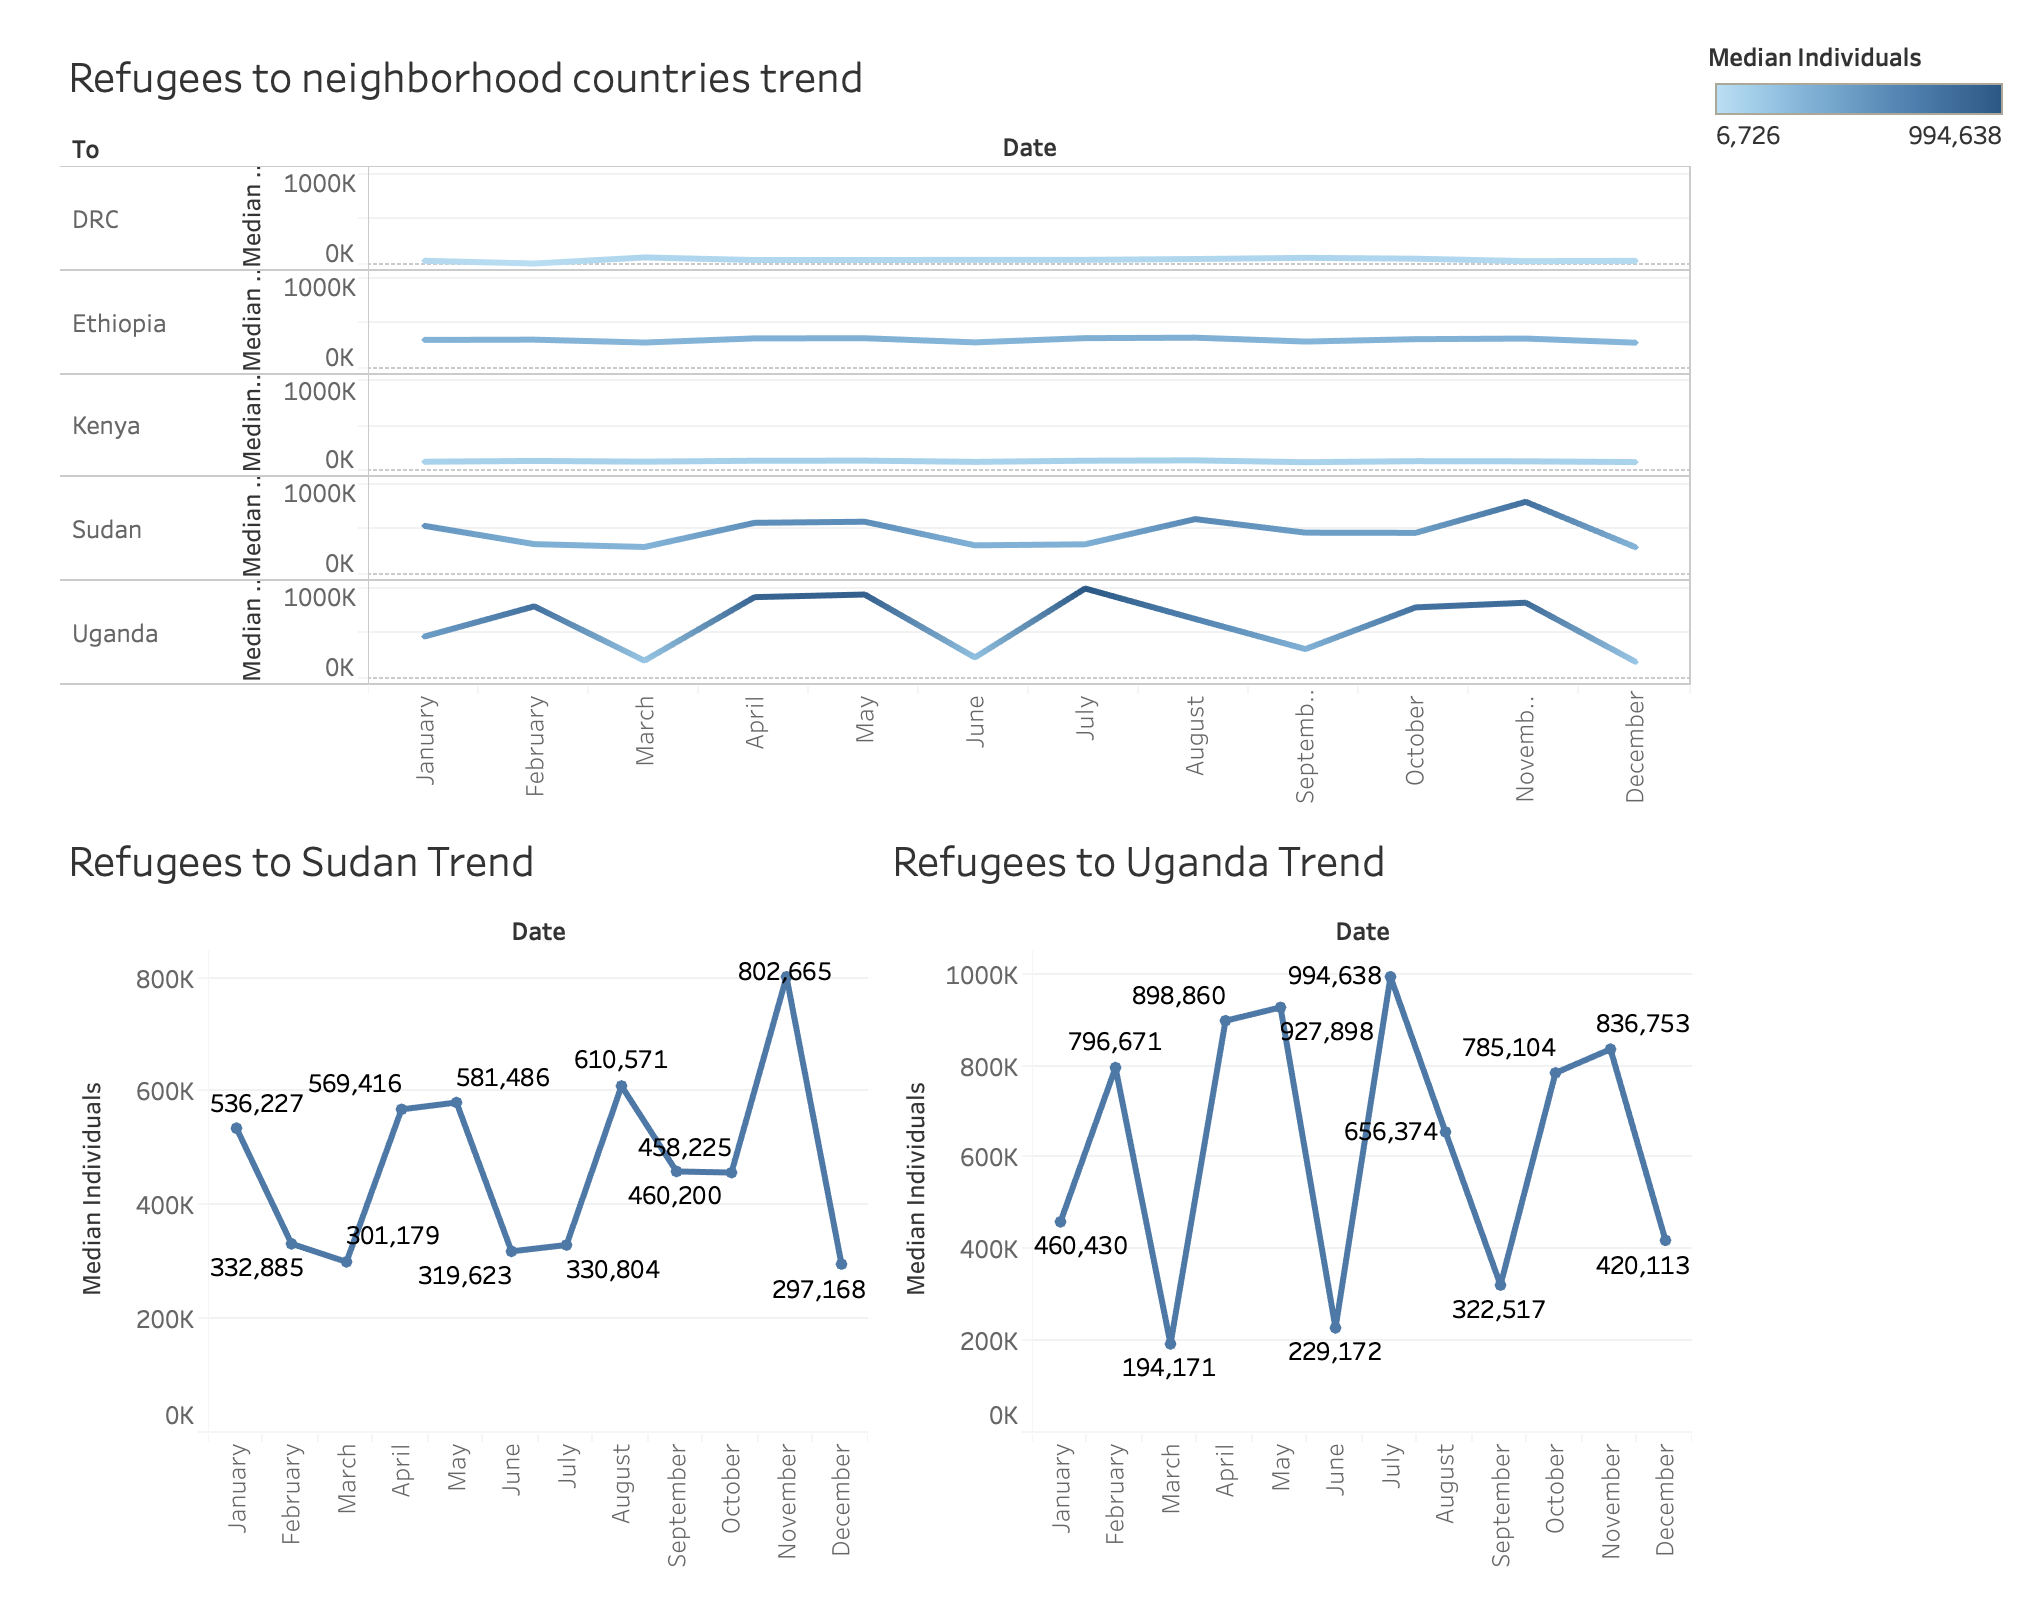

In [100]:
Image(filename='Results_R_To_NC/Dashboard_1.png') 

We first combined the datasets that records which country does the refugees go into one single big dataset. Then we visualize the dataset if there are any correlations between their choices. <br/>

From the first graph <b> Refugees to neighborhood countries trend </b>, we can see that the trend remains stable in DRC, Ethiopia and Kenya. There are no differences among seasons/months. However, for Sudan and Uganda we can see that the line is a lot more curved. <br/>

For this reason, we break down the graph and wanted to look more into what happen in Sudan and Uganda.

In the graph <b> Refugees to Sudan Trend </b> We observe that refugees are most likely to leave Sudan in March, June, July and December. They mostly travel to Sudan in November. And <b> Refugees to Uganda Trend </b> shows refugees leaves Uganda in March and June.

For the following parts, we will try to see if we can find out why refugees travel to / leave Uganda and Sudan in those particular timespots.

## Joining Refugees To [Country]/ From[South Sudan] Together

#Tableau Files
https://public.tableau.com/views/RefugeesFromSouthSudanTrend_2/Dashboard2?:embed=y&:display_count=yes&publish=yes

In [101]:
%%HTML
<div class='tableauPlaceholder' id='viz1548059851501' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend_2&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RefugeesFromSouthSudanTrend_2&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend_2&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548059851501');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## August - October, 2016 - Restart of civil war (From Juba)

By comparing the two graphs, we found that the increase of south sudanese displacements is caused by a huge increase of refugees going to Uganda in August to October, 2016. The significant increase is also noted by the UN goverment 

<i>"Displacement remained a defining feature of the crisis in South Sudan in September 2016, with tens of thousands of people newly internally displaced, and an average of 2,854 people fleeing across the border to Uganda each day, compared to 1,594 in August and 1,727 in July. During the month, the number of South Sudanese refugees in neighbouring countries passed the one million mark. In addition to the outflow to Uganda, increased arrivals were reported in the Democratic Republic of Congo (DRC) and in Ethiopia, where more than 32,000 South Sudanese arrived in Gambella following reported fighting in parts of Upper Nile, including Nasir, Maban, Mathiang and Maiwut. Inside South Sudan, sporadic clashes in Unity displaced civilians from Kaljak, Ding-Ding, Jazeera, Koch and Buaw into swampy areas and forced the relocation of more than 60 aid workers. In Central Equatoria, an estimated 30,000 people fled into Yei following deadly attacks and looting in nearby villages in mid-September. At the same time, communicable diseases continued to spread, with a new measles outbreak reported in Gogrial West in Warrap and cholera cases confirmed in Fangak in Jonglei."</i>

<i>"According to UNHCR and the Office of the Prime Minister (OPM), there has been an increase in the number of new refugee arrivals from 5 to 11 September 2016, with 24,814 arriving compared to 18,703 and 17,133 in the previous two weeks. Over 92,000 (64 per cent) of the new arrivals are children. <b>Bidibidi settlement in Yumbe is now hosting 72,000 refugees</b>, and the settlement has an estimated capacity for 100,000. Most of these refugees were relocated by OPM and UNHCR1 from Adjumani, Arua, Lamwo and Kiryandongo in order to decongest these camps.
UNHCR and partners conducted a mass nutrition (MUAC) screening in Bidibidi settlement over the past week. Data shows that 262 (5.6%) of the 4,683 children screened between the ages 6 to 59 months were found to be acutely malnourished. Of these, 54 (1.2%) were severely malnourished and 208 (4.4%) were moderately malnourished. 652 children were assessed at entry points of Oraba, Kuluba, Busia and Ocea, and among these, 20 children were diagnosed with malnutrition of which 13 were found to be suffering from Moderate Acute Malnutrition (MAM) and 7 with Severe Acute Malnutrition (SAM). The Global Acute Malnutrition (GAM) rate was low overall at 3.07%. Both the SAM and MAM rates were also low at 1.07% and 2% respectively.
Cumulatively, the number of cholera cases stands at 141 as of 11 September 2016 according to UNICEF field reports. Of these cases, 88 were discharged and 1 case is still admitted in the cholera treatment center. The case was reported to have originated from Amuru District. No case fatality has been registered to date. The number of new cases is steadily declining. This is attributed to efforts by Water, Sanitation and Hygiene (WASH) and Health partners including the district health and water offices, UNHCR, UNICEF, Uganda Red Cross Society (URCS), Lutheran World Federation (LWF), Medicins Sans Frontieres (MSF), Medical Teams International and Danish Refugee Council (DRC) who are actively engaged in the containment of the cholera outbreak."</i>

#### Update:

The increase of refugees in August appearently is caused by the restart of civil war in early July.

<i>Hundreds of South Sudanese refugees are arriving from the border, further swelling the numbers of an overcrowded camp that is already at four times its capacity, and increasing the risk of disease. Crammed into three coaches, these are the latest of more than 88,000 South Sudanese refugees to seek asylum here since early July, when civil war restarted in the world’s newest country. Earlier arrivals reached Uganda by canoe. Now they come by bus.</i>
Source: https://www.theguardian.com/global-development/2016/aug/25/south-sudanese-refugees-scars-civil-war-uganda

#### From Wikipedia

<i> "SPLA soldiers near Juba, shortly after the clashes in the city between followers of Riek Machar and Salva Kiir Mayardit.
Violence erupted in July 2016 after an attack outside of where President Kiir and Riek Machar were meeting in Juba. Fighting spread throughout the city. Over 300 people were killed and over 40 people were injured, including civilians.[196] In the following week, 26,000 fled to neighboring Uganda.[197] Indian Air Force evacuated Indian citizens from the country under Operation Sankat Mochan.[198] A spokesman for Riek Machar announced that South Sudan was "back to war" and that opposition forces based in areas of Juba had been attacked by forces loyal to the President.[199] Fighting involving heavy machine guns, mortars and tanks was reported in several parts of Juba on 10 July. Gun battles broke out near the airport and a UN base forcing the airport to close for safety reasons.[200] President Salva Kiir and first Vice-President Riek Machar ordered a ceasefire after days of intense violence.[201] Machar fled Juba after the clashes. After a 48-hour ultimatum given by Kiir for Machar to return to Juba to progress with the peace agreement talks passed, the SPLA-IO in Juba appointed lead negotiator Taban Deng Gai to replace Machar and the government accepted him as acting vice-president. Machar said any talks would be illegal because Machar had previously fired Gai.[197] Machar, with assistance from the UN, went to exile, first to Kinshasa[202] then to Sudan and then to South Africa, where he was allegedly[203] kept in house arrest.[63]" </i>

### Conflicts in Greater Upper Nile in Mid 2017

<i> "The other major front of the conflict remained the Greater Upper Nile, where government forces mostly fought John Uliny's SPLA-IO allied Agwelek forces. In a study of casualties up to early 2018, the deaths from violence peaked during this time between 2016-2017.[51] In October 2016, the rebels attempted to take Malakal[230] and by January 2017, fighting there had led to civilians deserting the country's second largest city.[231] In fighting in the Bahr el Ghazal region, pro-government militia Mathiang Anyoor attacked Wau killing up to 50 civilians in April 2017.[232] In the same month, SPLA-IO captured Raja, the capital of Lol State, while state governor Hassan claimed the city was immediately retaken.[233][234] A counteroffensive by the government starting in late April 2017 reversed most rebel gains,[235] captured the capital of the Shilluk kingdom, Kodok, from Uliny[236] and closed in on Pagak, which had been the SPLA-IO headquarters since 2014.[237][238] In July 2017, SPLA along with forces loyal to Taban Deng Gai took over the rebel-held town of Maiwut.[239][240][241] The government took over Pagak in August 2017 while the IO rebels still held territory in traditional Nuer areas of Panyijar Country in Unity state and rural areas of Jonglei and Akobo state.[242] SPLA-IO counterattacked Taban Deng Gai's SPLA-IO force, in an attempt to retake Pagak.[243]"</i>

### Joining Datasets together in one file

In [102]:
df_from = pd.read_csv('Cleaned_CsvFiles/refugees_from_southsudan_with_difference.csv')
df_to = pd.read_csv('Cleaned_CsvFiles/refugees_to_neighbor_countries_w_diff.csv')
df_to.head()

,Unnamed: 0,Unnamed: 0.1,date,timestamp,individuals,to,period_change,Year,Month,Day
0,0,0,2012-12-31,1356912000,12524,Uganda,0.0,2012,12,31
1,0,0,2013-12-31,1388448000,46176,Kenya,0.0,2013,12,31
2,0,0,2013-12-31,1388448000,68465,Ethiopia,0.0,2013,12,31
3,1,1,2013-12-31,1388448000,25274,Uganda,12750.0,2013,12,31
4,0,0,2014-03-31,1396224000,59580,Sudan,0.0,2014,3,31


In [103]:
df_to = df_to.drop(columns={'Unnamed: 0','Unnamed: 0.1'})

### Transform & Padding to fill up missing variables

In [104]:
df_to = df_to.pivot_table('period_change',['date','timestamp','Year','Month','Day'],'to').fillna(method='pad')

In [105]:
refugees_movement_records = df_from.merge(df_to, on = ['timestamp'],how='inner')
refugees_movement_records.sort_values(by = ['timestamp'])
refugees_movement_records = refugees_movement_records.drop(columns={'Unnamed: 0','Day','timestamp'})
refugees_movement_records = refugees_movement_records.dropna()
refugees_movement_records.head(3)

,date,individuals,Year,Month,Diff,DRC,Ethiopia,Kenya,Sudan,Uganda
3,2014-10-31,591356,2014,10,1796.0,0.0,46751.0,10895.0,10631.0,7415.0
4,2014-11-30,591356,2014,11,0.0,0.0,46751.0,10895.0,10631.0,7415.0
5,2014-12-31,616149,2014,12,24793.0,0.0,-4026.0,2269.0,18848.0,7702.0


In [106]:
rename = {"individuals" : "total_refugees", "Diff" : "refugees_move_out", "DRC" : "out_to_DRC", "Ethiopia" : "out_to_Ethiopia","Kenya":"out_to_Kenya","Sudan":"out_to_Sudan","Uganda":"out_to_uganda"}
refugees_movement_records = refugees_movement_records.rename(columns=rename)

In [107]:
### ! Check Again, since dates overlap in each month, we use mean when group by month
refugees_movement_records = refugees_movement_records.groupby(by=['Year','Month'], as_index= False).median().round(0)

In [108]:
refugees_movement_records.head(5)

,Year,Month,total_refugees,refugees_move_out,out_to_DRC,out_to_Ethiopia,out_to_Kenya,out_to_Sudan,out_to_uganda
0,2014,10,591356.0,1796.0,0.0,46751.0,10895.0,10631.0,7415.0
1,2014,11,591356.0,0.0,0.0,46751.0,10895.0,10631.0,7415.0
2,2014,12,616149.0,24793.0,0.0,-4026.0,2269.0,18848.0,7702.0
3,2015,1,617634.0,1485.0,0.0,1485.0,2269.0,18848.0,7702.0
4,2015,2,625069.0,7435.0,0.0,7435.0,2269.0,18848.0,7702.0


## Preparing to join ACLED_South Sudan Violence Events together

Tap here for Tableau: https://public.tableau.com/views/SouthSudanViolenceByMonthinEachYearSince2014/Dashboard2?:embed=y&:display_count=yes&publish=yes

In [109]:
%%HTML
<div class='tableauPlaceholder' id='viz1548064484800' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548064484800');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [110]:
%%HTML
<div class='tableauPlaceholder' id='viz1548064513085' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548064513085');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Prepare Violence File

In [111]:
#Read file
violence_events_df = pd.read_csv('Cleaned_CsvFiles/ACLED_south-sudan_cleaned.csv')

In [112]:
dropby = {'Unnamed: 0','data_id','event_date','Day','time_precision','actor1','actor2','interaction_type','region2','region3','location','latitude','longitude','geo_precision'}
violence_events_df = violence_events_df.drop(columns=dropby)
violence_events_df = violence_events_df.rename(columns={'year':'Year'})
violence_events_df.head()

,Year,event_type,actor1_type,actor2_type,region1,fatalities,Month
0,2018,Violence against civilians,Ethnic militia,Civilians,Lakes,2,11
1,2018,Violence against civilians,Political militia,Civilians,Western Bahr el Ghazal,1,11
2,2018,Strategic development,Rebel force,Government or mutinous force,Central Equatoria,0,11
3,2018,Violence against civilians,Political militia,Civilians,Eastern Equatoria,0,11
4,2018,Violence against civilians,Ethnic militia,Civilians,Jonglei,10,10


In [113]:
violence_events_df_battle_no_change = violence_events_df[violence_events_df['event_type'] == 'Violence against civilians']
violence_events_df.event_type.value_counts()

Battle-No change of territory                 2271
Violence against civilians                    1819
Strategic development                          422
Riots/Protests                                 244
Remote violence                                215
Battle-Non-state actor overtakes territory     137
Battle-Government regains territory            126
Non-violent transfer of territory               18
Headquarters or base established                 7
Name: event_type, dtype: int64

In [114]:
violence_events_df['count'] = 1
violence_events_df.tail()

,Year,event_type,actor1_type,actor2_type,region1,fatalities,Month,count
5254,2011,Strategic development,Rebel force,0,Central Equatoria,0,8,1
5255,2011,Battle-No change of territory,Rebel force,Government or mutinous force,Jonglei,1,7,1
5256,2011,Violence against civilians,Rebel force,Civilians,Western Bahr el Ghazal,0,7,1
5257,2011,Battle-No change of territory,Rebel force,Ethnic militia,Jonglei,0,7,1
5258,2011,Violence against civilians,Rebel force,Civilians,Western Bahr el Ghazal,0,7,1


### Transform data into counting how many type of events happen each month / how many events happen in each region each month

#### Transform -> Violence events by region in each month

In [115]:
violence_events_by_region_month = violence_events_df.groupby(by=['Year','Month','region1'],as_index=False)['count'].sum()
violence_events_by_region_month = pd.pivot_table(violence_events_by_region_month, values = 'count', index = ['Year', 'Month'], columns = ['region1'], aggfunc=np.sum).reset_index()

col_list= list(violence_events_by_region_month)
col_list.remove('Year')
col_list.remove('Month')
violence_events_by_region_month['total_events'] = violence_events_by_region_month[col_list].sum(axis = 1)
violence_events_by_region_month = violence_events_by_region_month.fillna(0.0)

violence_events_by_region_month.head()

region1,Year,Month,Central Equatoria,Eastern Equatoria,Gogrial,Jonglei,Lakes,Northern Bahr el Ghazal,Unity,Upper Nile,Warrap,Western Bahr el Ghazal,Western Equatoria,total_events
0,2011,7,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
1,2011,8,1.0,0.0,0.0,8.0,0.0,2.0,1.0,7.0,0.0,0.0,0.0,19.0
2,2011,9,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
3,2011,10,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0
4,2011,11,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,2.0,8.0


In [117]:
# Save File
violence_events_by_region_month.to_csv("Cleaned_CsvFiles/violence_events_by_region_month.csv", sep = ",")

#### Transform -> Violence events by type in each month

In [118]:
violence_events_by_type_month = violence_events_df.groupby(by=['Year','Month','event_type'],as_index=False)['count'].sum()
violence_events_by_type_month = pd.pivot_table(violence_events_by_type_month, values = 'count', index = ['Year', 'Month'], columns = ['event_type'], aggfunc=np.sum).reset_index()
col_list= list(violence_events_by_type_month)
col_list.remove('Year')
col_list.remove('Month')
violence_events_by_type_month['total_events'] = violence_events_by_type_month[col_list].sum(axis = 1)
violence_events_by_type_month = violence_events_by_type_month.fillna(0.0)
violence_events_by_type_month.head()

event_type,Year,Month,Battle-Government regains territory,Battle-No change of territory,Battle-Non-state actor overtakes territory,Headquarters or base established,Non-violent transfer of territory,Remote violence,Riots/Protests,Strategic development,Violence against civilians,total_events
0,2011,7,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
1,2011,8,1.0,8.0,0.0,0.0,0.0,2.0,0.0,1.0,7.0,19.0
2,2011,9,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
3,2011,10,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0
4,2011,11,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,8.0


In [119]:
# Save File
violence_events_by_type_month.to_csv("Cleaned_CsvFiles/violence_events_by_type_month.csv", sep = ",")

## Join refugees movements together

#### Join Refugees movements in each month with violence events by region in each month

In [120]:
refugees_movement_with_violence_region_by_month = violence_events_by_region_month.merge(refugees_movement_records, 
                                                                    on = ['Year','Month'], how = 'inner')
refugees_movement_with_violence_region_by_month.head(5)






,Year,Month,Central Equatoria,Eastern Equatoria,Gogrial,Jonglei,Lakes,Northern Bahr el Ghazal,Unity,Upper Nile,Warrap,Western Bahr el Ghazal,Western Equatoria,total_events,total_refugees,refugees_move_out,out_to_DRC,out_to_Ethiopia,out_to_Kenya,out_to_Sudan,out_to_uganda
0,2014,10,6.0,1.0,0.0,3.0,12.0,1.0,8.0,14.0,0.0,1.0,2.0,48.0,591356.0,1796.0,0.0,46751.0,10895.0,10631.0,7415.0
1,2014,11,4.0,3.0,0.0,12.0,2.0,0.0,3.0,12.0,2.0,3.0,3.0,44.0,591356.0,0.0,0.0,46751.0,10895.0,10631.0,7415.0
2,2014,12,3.0,5.0,0.0,11.0,6.0,0.0,3.0,6.0,6.0,4.0,4.0,48.0,616149.0,24793.0,0.0,-4026.0,2269.0,18848.0,7702.0
3,2015,1,7.0,2.0,0.0,4.0,6.0,1.0,13.0,16.0,1.0,8.0,3.0,61.0,617634.0,1485.0,0.0,1485.0,2269.0,18848.0,7702.0
4,2015,2,5.0,5.0,0.0,10.0,2.0,0.0,8.0,20.0,2.0,1.0,2.0,55.0,625069.0,7435.0,0.0,7435.0,2269.0,18848.0,7702.0


In [121]:
refugees_movement_with_violence_region_by_month.to_csv('Cleaned_CsvFiles/refugees_movement_with_violence_region_by_month.csv',sep=',')

#### Join Refugees movements in each month with violence events by type in each month

In [38]:
refugees_movement_with_violence_type_by_month = violence_events_by_type_month.merge(refugees_movement_records, 
                                                                    on = ['Year','Month'], how = 'inner')
refugees_movement_with_violence_type_by_month.head(5)








,Year,Month,Battle-Government regains territory,Battle-No change of territory,Battle-Non-state actor overtakes territory,Headquarters or base established,Non-violent transfer of territory,Remote violence,Riots/Protests,Strategic development,Violence against civilians,total_events,total_refugees,refugees_move_out,out_to_DRC,out_to_Ethiopia,out_to_Kenya,out_to_Sudan,out_to_uganda
0,2014,10,0.0,23.0,1.0,0.0,0.0,3.0,9.0,0.0,12.0,48.0,591356.0,1796.0,0.0,46751.0,10895.0,10631.0,7415.0
1,2014,11,2.0,20.0,1.0,0.0,0.0,6.0,6.0,0.0,9.0,44.0,591356.0,0.0,0.0,46751.0,10895.0,10631.0,7415.0
2,2014,12,1.0,21.0,1.0,0.0,0.0,4.0,2.0,2.0,17.0,48.0,616149.0,24793.0,0.0,-4026.0,2269.0,18848.0,7702.0
3,2015,1,0.0,25.0,1.0,0.0,0.0,6.0,3.0,5.0,21.0,61.0,617634.0,1485.0,0.0,1485.0,2269.0,18848.0,7702.0
4,2015,2,0.0,19.0,0.0,0.0,0.0,9.0,2.0,4.0,21.0,55.0,625069.0,7435.0,0.0,7435.0,2269.0,18848.0,7702.0


In [39]:
refugees_movement_with_violence_type_by_month['refugees_move_out'].describe(percentiles = [0.33,0.66])

count        49.000000
mean      26684.938776
std       67819.615139
min     -286595.000000
33%        2360.160000
50%        9108.000000
66%       30053.000000
max      199703.000000
Name: refugees_move_out, dtype: float64

In [40]:
refugees_movement_with_violence_type_by_month.to_csv('refugees_movement_with_violence_type_by_month.csv',sep=',')

### Join Everything Together

In [41]:
refugees_movement_w_violence_region_and_type_by_month = violence_events_by_region_month.merge(refugees_movement_with_violence_type_by_month, 
                                                                    on = ['Year','Month'], how = 'inner')
refugees_movement_w_violence_region_and_type_by_month.head(5)

,Year,Month,Central Equatoria,Eastern Equatoria,Gogrial,Jonglei,Lakes,Northern Bahr el Ghazal,Unity,Upper Nile,Warrap,Western Bahr el Ghazal,Western Equatoria,total_events_x,Battle-Government regains territory,Battle-No change of territory,Battle-Non-state actor overtakes territory,Headquarters or base established,Non-violent transfer of territory,Remote violence,Riots/Protests,Strategic development,Violence against civilians,total_events_y,total_refugees,refugees_move_out,out_to_DRC,out_to_Ethiopia,out_to_Kenya,out_to_Sudan,out_to_uganda
0,2014,10,6.0,1.0,0.0,3.0,12.0,1.0,8.0,14.0,0.0,1.0,2.0,48.0,0.0,23.0,1.0,0.0,0.0,3.0,9.0,0.0,12.0,48.0,591356.0,1796.0,0.0,46751.0,10895.0,10631.0,7415.0
1,2014,11,4.0,3.0,0.0,12.0,2.0,0.0,3.0,12.0,2.0,3.0,3.0,44.0,2.0,20.0,1.0,0.0,0.0,6.0,6.0,0.0,9.0,44.0,591356.0,0.0,0.0,46751.0,10895.0,10631.0,7415.0
2,2014,12,3.0,5.0,0.0,11.0,6.0,0.0,3.0,6.0,6.0,4.0,4.0,48.0,1.0,21.0,1.0,0.0,0.0,4.0,2.0,2.0,17.0,48.0,616149.0,24793.0,0.0,-4026.0,2269.0,18848.0,7702.0
3,2015,1,7.0,2.0,0.0,4.0,6.0,1.0,13.0,16.0,1.0,8.0,3.0,61.0,0.0,25.0,1.0,0.0,0.0,6.0,3.0,5.0,21.0,61.0,617634.0,1485.0,0.0,1485.0,2269.0,18848.0,7702.0
4,2015,2,5.0,5.0,0.0,10.0,2.0,0.0,8.0,20.0,2.0,1.0,2.0,55.0,0.0,19.0,0.0,0.0,0.0,9.0,2.0,4.0,21.0,55.0,625069.0,7435.0,0.0,7435.0,2269.0,18848.0,7702.0


In [42]:
refugees_movement_w_violence_region_and_type_by_month = refugees_movement_w_violence_region_and_type_by_month.drop(columns={'total_events_x'})

In [43]:
refugees_movement_w_violence_region_and_type_by_month.to_csv("refugees_movement_w_violence_region_and_type_by_month.csv", sep = ',')

## Prepare Price Data

In [44]:
price_data = pd.read_csv("Cleaned_CsvFiles/wfp_food_prices_south-sudan.csv")
price_data.category.value_counts()

cereals and tubers     2742
pulses and nuts        1936
non-food               1059
oil and fats            524
miscellaneous food       30
meat, fish and eggs      28
#item+type                1
Name: category, dtype: int64

In [45]:
price_data.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2012-01-15,Fuel (diesel) - Retail,L,non-food,7.9063,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
2,2012-02-15,Fuel (diesel) - Retail,L,non-food,7.275,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
3,2012-03-15,Fuel (diesel) - Retail,L,non-food,7.4531,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
4,2012-04-15,Fuel (diesel) - Retail,L,non-food,8.1719,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN


In [46]:
price_data = price_data.drop(price_data.index[0])

In [47]:
price_data['Year'] =[d.split('-')[0] for d in price_data.date]
price_data['Month'] = [d.split('-')[1] for d in price_data.date]
price_data.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default,Year,Month
1,2012-01-15,Fuel (diesel) - Retail,L,non-food,7.9063,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN,2012,01
2,2012-02-15,Fuel (diesel) - Retail,L,non-food,7.275,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN,2012,02
3,2012-03-15,Fuel (diesel) - Retail,L,non-food,7.4531,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN,2012,03
4,2012-04-15,Fuel (diesel) - Retail,L,non-food,8.1719,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN,2012,04
5,2012-05-15,Fuel (diesel) - Retail,L,non-food,11.9688,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN,2012,05


In [48]:
drop = {'unit','currency','cmname','mktname','country','admname','adm1id','mktid','cmid','ptid','umid','catid','sn','default'}
price_data = price_data.drop(columns=drop)

In [49]:
price_data['Year'] = price_data['Year'].astype(int)
price_data['Month'] = price_data['Month'].astype(int)
price_data['price'] = price_data['price'].astype(np.float64)
price_data.dtypes

date         object
category     object
price       float64
Year          int64
Month         int64
dtype: object

In [50]:
price_data_by_month = price_data.groupby(by = ['Year','Month','category'], as_index = False).aggregate(np.mean)
price_data_by_month = price_data_by_month[price_data_by_month['Year'] >= 2014]
price_data_by_month.head()

,Year,Month,category,price
207,2014,1,cereals and tubers,15.357143
208,2014,1,non-food,7.463750
209,2014,1,oil and fats,11.333333
210,2014,1,pulses and nuts,15.888889
211,2014,2,cereals and tubers,13.428571


In [51]:
price_data_by_month = pd.pivot_table(price_data_by_month, values = 'price', index = ['Year', 'Month'], columns=['category'])
price_data_by_month = price_data_by_month.drop(columns={'meat, fish and eggs','miscellaneous food'})

In [52]:
price_data_by_month.head()

category    cereals and tubers  non-food  oil and fats  pulses and nuts
Year Month                                                             
2014 1               15.357143  7.463750     11.333333        15.888889
     2               13.428571  7.016875     10.333333        14.777778
     3               12.250000  7.116875     11.666667        14.333333
     4               11.866667  7.104375     10.000000        14.333333
     5               12.214286  7.148125      8.666667        13.888889

In [53]:
price_data_by_month = price_data_by_month.to_csv("price_data_by_month.csv", sep=',')

## Join Price Data Together

In [54]:
price_data_by_month = pd.read_csv("price_data_by_month.csv")
refugees_movement_w_violence_region_and_event_type = pd.read_csv("refugees_movement_w_violence_region_and_type_by_month.csv")

In [55]:
price_data_by_month.tail(10)

,Year,Month,cereals and tubers,non-food,oil and fats,pulses and nuts
42,2017,7,291.741935,239.907778,295.727273,334.480769
43,2017,8,282.425926,245.642857,280.300000,347.978261
44,2017,9,240.500000,NaN,342.666667,221.666667
45,2017,10,268.250000,303.800000,293.181818,305.739130
46,2017,11,241.086957,248.948571,301.000000,278.944444
47,2017,12,257.266667,260.424286,292.800000,263.650000
48,2018,1,277.911765,243.364118,297.400000,317.523810
49,2018,3,314.016949,2582.267115,372.090909,381.142857
50,2018,4,329.459091,2769.842600,445.450000,484.869048
51,2018,8,360.576923,3032.653267,404.111111,482.590909


In [56]:
refugees_movement_w_violence_region_and_event_type.tail(10)

,Unnamed: 0,Year,Month,Central Equatoria,Eastern Equatoria,Gogrial,Jonglei,Lakes,Northern Bahr el Ghazal,Unity,Upper Nile,Warrap,Western Bahr el Ghazal,Western Equatoria,Battle-Government regains territory,Battle-No change of territory,Battle-Non-state actor overtakes territory,Headquarters or base established,Non-violent transfer of territory,Remote violence,Riots/Protests,Strategic development,Violence against civilians,total_events_y,total_refugees,refugees_move_out,out_to_DRC,out_to_Ethiopia,out_to_Kenya,out_to_Sudan,out_to_uganda
39,39,2018,1,18.0,3.0,0.0,19.0,1.0,1.0,7.0,3.0,2.0,5.0,4.0,0.0,37.0,0.0,2.0,0.0,2.0,2.0,6.0,14.0,63.0,2432246.0,5313.0,932.0,4459.0,532.0,860.0,-15351.0
40,40,2018,2,12.0,4.0,0.0,10.0,5.0,0.0,14.0,4.0,5.0,8.0,2.0,0.0,38.0,0.0,0.0,0.0,0.0,3.0,3.0,20.0,64.0,2450190.0,13212.0,1033.0,6608.0,307.0,1950.0,176.0
41,41,2018,3,16.0,4.0,0.0,13.0,2.0,0.0,2.0,10.0,4.0,4.0,0.0,0.0,28.0,1.0,0.0,0.0,2.0,3.0,2.0,19.0,55.0,2463970.0,2388.0,1034.0,5696.0,526.0,-1273.0,15704.0
42,42,2018,4,14.0,0.0,0.0,10.0,1.0,2.0,29.0,3.0,0.0,2.0,2.0,0.0,41.0,0.0,0.0,0.0,2.0,1.0,4.0,15.0,63.0,2470806.0,1186.0,674.0,2532.0,-172.0,-2859.0,11999.0
43,43,2018,5,5.0,1.0,0.0,3.0,4.0,2.0,4.0,9.0,7.0,5.0,8.0,0.0,22.0,0.0,0.0,0.0,0.0,2.0,6.0,18.0,48.0,2477177.0,5637.0,831.0,1516.0,472.0,16.0,7020.0
44,44,2018,6,11.0,6.0,0.0,0.0,4.0,0.0,2.0,3.0,2.0,26.0,6.0,4.0,26.0,4.0,0.0,0.0,0.0,1.0,6.0,19.0,60.0,2485196.0,2214.0,868.0,2667.0,134.0,2339.0,1601.0
45,45,2018,7,21.0,4.0,0.0,5.0,8.0,0.0,6.0,1.0,0.0,5.0,4.0,0.0,26.0,0.0,0.0,0.0,0.0,1.0,10.0,17.0,54.0,2495764.0,9814.0,477.0,1230.0,76.0,1758.0,8031.0
46,46,2018,8,18.0,4.0,0.0,4.0,1.0,0.0,2.0,1.0,4.0,1.0,1.0,2.0,11.0,0.0,0.0,0.0,0.0,2.0,11.0,10.0,36.0,2477899.0,-14757.0,454.0,-11620.0,112.0,-2848.0,8031.0
47,47,2018,9,28.0,4.0,0.0,1.0,5.0,0.0,5.0,0.0,2.0,3.0,4.0,0.0,28.0,2.0,0.0,1.0,0.0,0.0,10.0,11.0,52.0,2466962.0,830.0,441.0,-24471.0,6.0,572.0,8031.0
48,48,2018,10,29.0,2.0,0.0,9.0,10.0,0.0,2.0,1.0,1.0,22.0,1.0,0.0,43.0,1.0,0.0,0.0,0.0,4.0,11.0,18.0,77.0,2181316.0,-286595.0,735.0,-24471.0,-439.0,1130.0,-288021.0


In [57]:
refugees_T_F_V_P_full_data = refugees_movement_w_violence_region_and_event_type.merge(price_data_by_month, on = ['Year','Month'], how = 'left')
refugees_T_F_V_P_full_data = refugees_T_F_V_P_full_data.drop(columns = {'Unnamed: 0'})

In [58]:
# Fill missing values
refugees_T_F_V_P_full_data = refugees_T_F_V_P_full_data.fillna(method='pad')

In [59]:
refugees_T_F_V_P_full_data.to_csv("refugees_T_F_V_P_full_data.csv", sep = ",")

# Data Mining Results (Weka) with dataset above

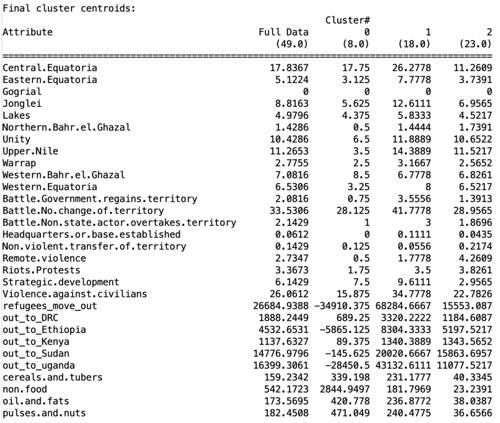

In [83]:
Image(filename='Weka_Results/Picture1.png') 

Cluster 0: From looking at the number of refugees that moved out of the country, we defined this group as the group of people who moved during the “Peaceful Period”. People were either moving out slowly or coming back to South Sudan from other countries during this period. The prices of everyday essentials were at their maximum and fuel prices (non-food) were growing aggressively. There were fewer violent and non-violent events in most parts of the country, and battles and violence against civilians were less. However, the number of strategic developments was also high during this period which could cause greater conflicts in the future.<br/><br/>
Cluster 1: This cluster represents be the hardest period for refugees, this is the ‘War Starting Period’. People were moving out of the country significantly, as violent and non-violent events were generally occurring in the politically central areas (capital cities with government authority). The number of violent events against civilians and battles around the country increased and the price of different items increased. Most people migrated to Uganda and Sudan. The prices were a bit above-average at this point.<br/><br/>
Cluster 2: We defined this group as the “During War Period”. People were constantly moving out to neighboring countries because of the consistent violent and non-violent events that happened across the country. During this period, the price of most items were at their lowest.<br/>

### Playaround with existing datasets

In [60]:
refugees_T_F_V_P_full_data = pd.read_csv("refugees_T_F_V_P_full_data.csv")
refugees_T_F_V_P_full_data = refugees_T_F_V_P_full_data.drop(columns={'Unnamed: 0'})
refugees_T_F_V_P_full_data.head()

,Year,Month,Central Equatoria,Eastern Equatoria,Gogrial,Jonglei,Lakes,Northern Bahr el Ghazal,Unity,Upper Nile,Warrap,Western Bahr el Ghazal,Western Equatoria,Battle-Government regains territory,Battle-No change of territory,Battle-Non-state actor overtakes territory,Headquarters or base established,Non-violent transfer of territory,Remote violence,Riots/Protests,Strategic development,Violence against civilians,total_events_y,total_refugees,refugees_move_out,out_to_DRC,out_to_Ethiopia,out_to_Kenya,out_to_Sudan,out_to_uganda,cereals and tubers,non-food,oil and fats,pulses and nuts
0,2014,10,6.0,1.0,0.0,3.0,12.0,1.0,8.0,14.0,0.0,1.0,2.0,0.0,23.0,1.0,0.0,0.0,3.0,9.0,0.0,12.0,48.0,591356.0,1796.0,0.0,46751.0,10895.0,10631.0,7415.0,15.830394,4.1325,12.593750,13.458332
1,2014,11,4.0,3.0,0.0,12.0,2.0,0.0,3.0,12.0,2.0,3.0,3.0,2.0,20.0,1.0,0.0,0.0,6.0,6.0,0.0,9.0,44.0,591356.0,0.0,0.0,46751.0,10895.0,10631.0,7415.0,18.447614,4.3425,15.369057,14.735526
2,2014,12,3.0,5.0,0.0,11.0,6.0,0.0,3.0,6.0,6.0,4.0,4.0,1.0,21.0,1.0,0.0,0.0,4.0,2.0,2.0,17.0,48.0,616149.0,24793.0,0.0,-4026.0,2269.0,18848.0,7702.0,15.366667,4.4175,12.662500,13.252941
3,2015,1,7.0,2.0,0.0,4.0,6.0,1.0,13.0,16.0,1.0,8.0,3.0,0.0,25.0,1.0,0.0,0.0,6.0,3.0,5.0,21.0,61.0,617634.0,1485.0,0.0,1485.0,2269.0,18848.0,7702.0,17.917647,4.6175,13.125000,14.426667
4,2015,2,5.0,5.0,0.0,10.0,2.0,0.0,8.0,20.0,2.0,1.0,2.0,0.0,19.0,0.0,0.0,0.0,9.0,2.0,4.0,21.0,55.0,625069.0,7435.0,0.0,7435.0,2269.0,18848.0,7702.0,16.893750,4.6103,16.571429,13.764286


In [61]:
from sklearn import preprocessing

x = refugees_T_F_V_P_full_data.values#returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
refugees_T_F_V_P_full_data_normalized = pd.DataFrame(x_scaled, columns=refugees_T_F_V_P_full_data.columns)

In [62]:
refugees_T_F_V_P_full_data.dtypes

Year                                            int64
Month                                           int64
Central Equatoria                             float64
Eastern Equatoria                             float64
Gogrial                                       float64
Jonglei                                       float64
Lakes                                         float64
Northern Bahr el Ghazal                       float64
Unity                                         float64
Upper Nile                                    float64
Warrap                                        float64
Western Bahr el Ghazal                        float64
Western Equatoria                             float64
Battle-Government regains territory           float64
Battle-No change of territory                 float64
Battle-Non-state actor overtakes territory    float64
Headquarters or base established              float64
Non-violent transfer of territory             float64
Remote violence             

In [63]:
refugees_T_F_V_P_full_data_normalized.head()

,Year,Month,Central Equatoria,Eastern Equatoria,Gogrial,Jonglei,Lakes,Northern Bahr el Ghazal,Unity,Upper Nile,Warrap,Western Bahr el Ghazal,Western Equatoria,Battle-Government regains territory,Battle-No change of territory,Battle-Non-state actor overtakes territory,Headquarters or base established,Non-violent transfer of territory,Remote violence,Riots/Protests,Strategic development,Violence against civilians,total_events_y,total_refugees,refugees_move_out,out_to_DRC,out_to_Ethiopia,out_to_Kenya,out_to_Sudan,out_to_uganda,cereals and tubers,non-food,oil and fats,pulses and nuts
0,0.00,0.818182,0.044776,0.038462,0.0,0.081081,1.000000,0.142857,0.250000,0.368421,0.000000,0.038462,0.111111,0.000000,0.260870,0.083333,0.0,0.0,0.333333,0.818182,0.0000,0.049180,0.107143,0.000000,0.593033,0.000521,1.000000,1.000000,0.183938,0.674090,0.001343,0.000000,0.000000,0.000436
1,0.00,0.909091,0.014925,0.115385,0.0,0.324324,0.166667,0.000000,0.071429,0.315789,0.285714,0.115385,0.166667,0.076923,0.195652,0.083333,0.0,0.0,0.666667,0.545455,0.0000,0.000000,0.071429,0.000000,0.589340,0.000521,1.000000,1.000000,0.183938,0.674090,0.008925,0.000069,0.006412,0.003144
2,0.00,1.000000,0.000000,0.192308,0.0,0.297297,0.500000,0.000000,0.071429,0.157895,0.857143,0.153846,0.222222,0.038462,0.217391,0.083333,0.0,0.0,0.444444,0.181818,0.1250,0.131148,0.107143,0.013019,0.640323,0.000521,0.287060,0.681838,0.225455,0.674745,0.000000,0.000094,0.000159,0.000000
3,0.25,0.000000,0.059701,0.076923,0.0,0.108108,0.500000,0.142857,0.428571,0.421053,0.142857,0.307692,0.166667,0.000000,0.304348,0.083333,0.0,0.0,0.666667,0.272727,0.3125,0.196721,0.223214,0.013799,0.592394,0.000521,0.364438,0.681838,0.225455,0.674745,0.007390,0.000160,0.001227,0.002489
4,0.25,0.090909,0.029851,0.192308,0.0,0.270270,0.166667,0.000000,0.250000,0.526316,0.285714,0.038462,0.111111,0.000000,0.173913,0.000000,0.0,0.0,1.000000,0.181818,0.2500,0.196721,0.169643,0.017703,0.604629,0.000521,0.447980,0.681838,0.225455,0.674745,0.004424,0.000158,0.009189,0.001084


In [64]:
refugees_T_F_V_P_full_data_normalized = refugees_T_F_V_P_full_data_normalized.drop(columns={'Year','Month'})
refugees_T_F_V_P_full_data_normalized.to_csv("refugees_T_F_V_P_full_data_normalized.csv", sep = ',')

In [65]:
refugees_T_F_V_P_full_data.describe()

,Year,Month,Central Equatoria,Eastern Equatoria,Gogrial,Jonglei,Lakes,Northern Bahr el Ghazal,Unity,Upper Nile,Warrap,Western Bahr el Ghazal,Western Equatoria,Battle-Government regains territory,Battle-No change of territory,Battle-Non-state actor overtakes territory,Headquarters or base established,Non-violent transfer of territory,Remote violence,Riots/Protests,Strategic development,Violence against civilians,total_events_y,total_refugees,refugees_move_out,out_to_DRC,out_to_Ethiopia,out_to_Kenya,out_to_Sudan,out_to_uganda,cereals and tubers,non-food,oil and fats,pulses and nuts
count,49.000000,49.000000,49.000000,49.000000,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2016.285714,6.571429,17.836735,5.122449,0.0,8.816327,4.979592,1.428571,10.428571,11.265306,2.775510,7.081633,6.530612,2.081633,33.530612,2.142857,0.061224,0.142857,2.734694,3.367347,6.142857,26.061224,76.265306,1.435692e+06,26684.938776,1888.244898,4532.653061,1137.632653,14776.979592,16399.306122,159.234174,542.172273,173.569489,182.450774
std,1.224745,3.488075,13.632600,5.134169,0.0,6.313588,3.256339,1.695582,6.861730,9.805984,2.064232,5.725807,4.345026,4.081650,10.595011,2.590045,0.316765,0.353553,2.612275,2.489092,4.198214,12.766180,25.622887,7.354315e+05,67819.615139,4265.397747,12328.236386,3817.325213,29207.495676,54602.907473,125.601583,1033.385561,151.440132,168.559607
min,2014.000000,1.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,36.000000,5.913560e+05,-286595.000000,-13.000000,-24471.000000,-16217.000000,-25774.000000,-288021.000000,15.366667,4.132500,12.593750,13.252941
25%,2015.000000,4.000000,7.000000,2.000000,0.0,5.000000,2.000000,0.000000,5.000000,4.000000,1.000000,4.000000,3.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,17.000000,57.000000,7.693250e+05,1485.000000,0.000000,1118.000000,134.000000,1355.000000,7702.000000,27.739130,17.251111,27.380000,27.077500
50%,2016.000000,7.000000,15.000000,4.000000,0.0,8.000000,4.000000,1.000000,9.000000,9.000000,2.000000,5.000000,5.000000,1.000000,33.000000,1.000000,0.000000,0.000000,2.000000,3.000000,6.000000,23.000000,72.000000,1.288334e+06,9108.000000,735.000000,2530.000000,1323.000000,5302.000000,13741.000000,149.773077,95.966667,132.305000,120.785714
75%,2017.000000,10.000000,24.000000,7.000000,0.0,11.000000,7.000000,2.000000,14.000000,16.000000,4.000000,8.000000,9.000000,2.000000,42.000000,3.000000,0.000000,0.000000,5.000000,5.000000,10.000000,32.000000,98.000000,2.108017e+06,63376.000000,1547.000000,6608.000000,2473.000000,18848.000000,19691.000000,277.911765,245.642857,295.727273,317.523810
max,2018.000000,12.000000,70.000000,26.000000,0.0,37.000000,12.000000,7.000000,29.000000,38.000000,7.000000,26.000000,18.000000,26.000000,57.000000,12.000000,2.000000,1.000000,9.000000,11.000000,16.000000,70.000000,148.000000,2.495764e+06,199703.000000,24932.000000,46751.000000,10895.000000,172146.000000,150253.000000,360.576923,3032.653267,445.450000,484.869048


In [66]:
s = refugees_T_F_V_P_full_data['total_events_y'].quantile([.25, .5, .75])
print(s[.25])

57.0


In [67]:
#cats = ['Low', 'Medium', 'High']
#quantiles = refugees_T_F_V_P_full_data.iloc[:,2:].quantile([0, 0.25, 0.75, 1.0])
categorized_T_F_V_P = pd.DataFrame()
name_list = list(refugees_T_F_V_P_full_data)

for name in name_list:
    if name != 'Year' and name != 'Month':
        new_row = []
        quantiles = refugees_T_F_V_P_full_data[name].quantile([.33, .66])
        row_list = refugees_T_F_V_P_full_data[name].tolist()
        for i, value in enumerate(row_list):
            if value < quantiles[.33]:
                new_row.append("Low")
            elif value < quantiles[.66] and value >= quantiles[.33]:
                new_row.append("Average")
            else:
                new_row.append("High")
        series = pd.Series(new_row)
        categorized_T_F_V_P[name] = series.values

categorized_T_F_V_P.head()
        
            
            
    

,Central Equatoria,Eastern Equatoria,Gogrial,Jonglei,Lakes,Northern Bahr el Ghazal,Unity,Upper Nile,Warrap,Western Bahr el Ghazal,Western Equatoria,Battle-Government regains territory,Battle-No change of territory,Battle-Non-state actor overtakes territory,Headquarters or base established,Non-violent transfer of territory,Remote violence,Riots/Protests,Strategic development,Violence against civilians,total_events_y,total_refugees,refugees_move_out,out_to_DRC,out_to_Ethiopia,out_to_Kenya,out_to_Sudan,out_to_uganda,cereals and tubers,non-food,oil and fats,pulses and nuts
0,Low,Low,High,Low,High,Average,Average,High,Low,Low,Low,Average,Low,Average,High,High,High,High,Low,Low,Low,Low,Low,Average,High,High,Average,Low,Low,Low,Low,Low
1,Low,Average,High,High,Low,Average,Low,High,Average,Low,Low,High,Low,Average,High,High,High,High,Low,Low,Low,Low,Low,Average,High,High,Average,Low,Low,Low,Low,Low
2,Low,High,High,High,High,Average,Low,Average,High,Average,Average,Average,Low,Average,High,High,High,Average,Low,Low,Low,Low,Average,Average,Low,High,High,Low,Low,Low,Low,Low
3,Low,Low,High,Low,High,Average,High,High,Low,High,Low,Average,Low,Average,High,High,High,Average,Average,Average,Average,Low,Low,Average,Average,High,High,Low,Low,Low,Low,Low
4,Low,High,High,High,Low,Average,Average,High,Average,Low,Low,Average,Low,Low,High,High,High,Average,Average,Average,Low,Low,Average,Average,High,High,High,Low,Low,Low,Low,Low


In [68]:
categorized_T_F_V_P.to_csv("categorized_T_F_V_P.csv",sep = ",")

In [69]:
  for i, row in df.iterrows():
      ifor_val = something
      if <condition>:
        ifor_val = something_else
      df.at[i,'ifor'] = ifor_val

def turn_into_categorical(row):
    quantile_level = [.25, .5, .75]
    for r in row:
        cut = refugees_T_F_V_P_full_data.r.quantile(quantile_level)
        if r >= cut[.75]:
            return "High"
        elif r >= cut[.25] and r < cut[0.75]:
            return "Average"
        else:
            return "Low"
        
refugees_T_F_V_P_full_data.apply(turn_into_categorical, axis = 1)

SyntaxError: invalid syntax (<ipython-input-69-89e708eaccd0>, line 3)

In [ ]:
def set_movement_aggresiveness(row):
    if row["out_to_Sudan"] > 18848:
        return "Extra Big Move"
    elif row['out_to_Sudan'] <= 18848 and row['out_to_Sudan'] > 5302:
        return "Big Move"
    elif row['out_to_Sudan'] <= 5302 and row['out_to_Sudan'] > 1355:
        return "Medium Move"
    else:
        return "Small Move or Move back to Sudan"
    
refugees_T_F_V_P_full_data_wclass = refugees_T_F_V_P_full_data.assign(status = refugees_T_F_V_P_full_data.apply(set_movement_aggresiveness, axis = 1))
print(refugees_T_F_V_P_full_data_wclass)

In [ ]:
refugees_T_F_V_P_full_data_wclass.to_csv("refugees_T_F_V_P_full_data_wclass.csv", sep = ',')

In [ ]:
def set_movement_aggresiveness(row):
    if row["Diff"] > 30053:
        return "Big Move"
    elif row['Diff'] <= 30053 and row['Diff'] > 3596:
        return "Middle Move"
    else:
        return "Small Move or Return"
    
refugees_movement_w_v_region_and_type_by_month_class = refugees_movement_w_violence_region_and_type_by_month.assign(status = refugees_movement_w_violence_region_and_type_by_month.apply(set_movement_aggresiveness, axis = 1))
refugees_movement_w_v_region_and_type_by_month_class.head()

In [ ]:
refugees_movement_w_v_region_and_type_by_month_class.to_csv('refugees_movement_w_v_region_and_type_by_month_class.csv',sep= ',')

In [ ]:
def define_big_movements(row):
    country = ['DRC','Ethiopia','Kenya','Sudan','Uganda']
    max_diff = ""
    second_max_diff = ""
    for i in range(0, len(country) - 1):
        if row[country[i + 1]] > row[country[i]]:
            max_diff = country[i + 1]
    return max_diff
    
need_to_change = need_to_change.assign(most_likely_to = need_to_change.apply(define_big_movements, axis = 1))
need_to_change.head()
#refugees_movement_records.describe()

In [ ]:
def define_second_big_movements(row):
    country = ['DRC','Ethiopia','Kenya','Sudan','Uganda']
    second_max_diff = ""
    country.remove(row['most_likely_to'])
    for i in range(0, len(country) - 1):
        if row[country[i + 1]] > row[country[i]]:
            second_max_diff = country[i + 1]
    return second_max_diff
        
need_to_change = need_to_change.assign(second_likely_to = need_to_change.apply(define_big_movements, axis = 1))
need_to_change.head()
#refugees_movement_records.describe()    
    
    

In [ ]:
refugees_movement_w_violence_region_and_event_type.to_csv("refugees_movement_w_violence_region_and_event_type.csv",sep=',')

### Previous Code

In [ ]:
violence_events_df.region1.value_counts()

In [ ]:
violence_events_df_war_2016 = violence_events_df[violence_events_df['year'] == 2016]
violence_events_df_war_2014 = violence_events_df[violence_events_df['year'] == 2014]
violence_events_df_war_2017 = violence_events_df[violence_events_df['year'] == 2017]

concat = [violence_events_df_war_2014, violence_events_df_war_2016, violence_events_df_war_2017]
violence_events_df_war_year = pd.concat(concat)

In [ ]:
violence_events_df_war_year.to_csv('violence_events_df_war_year.csv', sep=',')